# How to use Metadata Editor

In [1]:
from pymetadataeditor import MetadataEditor

## Examples of the interface

In [2]:
your_api_key = "<your api key here>"
api_url = "<your api url here>"
me = MetadataEditor(api_url=api_url, api_key=your_api_key)

### Listing your projects

In [3]:
me.list_projects()

,type,idno,study_idno,title,abbreviation,nation,year_start,year_end,published,created,changed,varcount,created_by,changed_by,is_shared,thumbnail,template_uid,username,username_cr,collections
id,,,,,,,,,,,,,,,,,,,,
7,survey,f47e881f-5cbe-4b97-bf99-5f544c9d0d5a,WLD_2023_SYNTH-SVY-EN_v01_M,"Synthetic Data for an Imaginary Country, Sampl...",None,,0,0,None,2023-06-29T17:35:47-04:00,2023-06-29T17:35:47-04:00,None,1,1,None,thumbnail-1620.JPG,None,mehmood asghar,mehmood asghar,"[{'id': '36', 'title': 'test', 'sid': '7'}]"
62,survey,07abfb4e-4fe7-46ff-9be9-3c63a2dc888b,WLD_2023_WFSO_v01_M,World Food Security Outlook,None,,0,0,None,2023-11-10T11:09:23-05:00,2024-02-13T12:38:04-05:00,None,1,1,1,thumbnail-1682.png,None,mehmood asghar,mehmood asghar,"[{'id': '36', 'title': 'test', 'sid': '62'}]"
1616,survey,1708ad38-6cb1-4bca-b400-a21832669b06,SRB_2021_DHIPIE-EL_v01_M,Inclusive Early Childhood Education and Care I...,None,,0,0,None,2024-03-14T09:58:11-04:00,2024-03-14T09:58:11-04:00,None,1,1,None,None,None,mehmood asghar,mehmood asghar,"[{'id': '36', 'title': 'test', 'sid': '1616'}]"
2267,timeseries,example-timeseries-project-idno-03,example-timeseries-01,Example Timeseries - Travel services (% of com...,None,,0,0,None,2024-04-04T14:16:01-04:00,2024-04-04T14:25:50-04:00,None,1,1,None,None,None,mehmood asghar,mehmood asghar,"[{'id': '36', 'title': 'test', 'sid': '2267'}]"


### Creating a new project

In [4]:
series_description = {
                        "idno": "GB20240621_demo1",
                        "doi": "V1",
                        "name": "Version 1",
                        "display_name": "Version 1"
                     }

me.create_timeseries(idno="GB20240621_demo1",
                     series_description=series_description)

In [5]:
me.list_projects()

,type,idno,study_idno,title,abbreviation,nation,year_start,year_end,published,created,changed,varcount,created_by,changed_by,is_shared,thumbnail,template_uid,username,username_cr,collections
id,,,,,,,,,,,,,,,,,,,,
7,survey,f47e881f-5cbe-4b97-bf99-5f544c9d0d5a,WLD_2023_SYNTH-SVY-EN_v01_M,"Synthetic Data for an Imaginary Country, Sampl...",None,,0,0,None,2023-06-29T17:35:47-04:00,2023-06-29T17:35:47-04:00,None,1,1,None,thumbnail-1620.JPG,None,mehmood asghar,mehmood asghar,"[{'id': '36', 'title': 'test', 'sid': '7'}]"
62,survey,07abfb4e-4fe7-46ff-9be9-3c63a2dc888b,WLD_2023_WFSO_v01_M,World Food Security Outlook,None,,0,0,None,2023-11-10T11:09:23-05:00,2024-02-13T12:38:04-05:00,None,1,1,1,thumbnail-1682.png,None,mehmood asghar,mehmood asghar,"[{'id': '36', 'title': 'test', 'sid': '62'}]"
1616,survey,1708ad38-6cb1-4bca-b400-a21832669b06,SRB_2021_DHIPIE-EL_v01_M,Inclusive Early Childhood Education and Care I...,None,,0,0,None,2024-03-14T09:58:11-04:00,2024-03-14T09:58:11-04:00,None,1,1,None,None,None,mehmood asghar,mehmood asghar,"[{'id': '36', 'title': 'test', 'sid': '1616'}]"
2267,timeseries,example-timeseries-project-idno-03,example-timeseries-01,Example Timeseries - Travel services (% of com...,None,,0,0,None,2024-04-04T14:16:01-04:00,2024-04-04T14:25:50-04:00,None,1,1,None,None,None,mehmood asghar,mehmood asghar,"[{'id': '36', 'title': 'test', 'sid': '2267'}]"
2660,timeseries,GB20240621_demo1,GB20240621_demo1,Version 1,None,,0,0,None,2024-06-21T16:06:36-04:00,2024-06-21T16:06:36-04:00,None,63,63,None,None,30ab32c7d62aa6e2801efcf336658dbb,Gordon Blackadder,Gordon Blackadder,[]


In [6]:
me.get_project_by_id(2660)['metadata']

{'idno': 'GB20240621_demo1',
 'series_description': {'idno': 'GB20240621_demo1',
  'doi': 'V1',
  'name': 'Version 1',
  'display_name': 'Version 1'},
 'changed_by': '63',
 'changed': '1719000396'}

### Updating an existing project

In [7]:
updated_series_description= {
                "idno": "GB20240621_demo1",
                "doi": "V2",
                "name": "Version 2",
                "display_name": "Version 2",
                "authoring_entity": [{"name": "example agency"}]
                }

me.update_timeseries_by_id(2660, series_description=updated_series_description)

In [8]:
me.get_project_by_id(2660)['metadata']

{'idno': 'GB20240621_demo1',
 'series_description': {'idno': 'GB20240621_demo1',
  'doi': 'V2',
  'name': 'Version 2',
  'display_name': 'Version 2',
  'authoring_entity': [{'name': 'example agency'}]},
 'changed_by': '63',
 'changed': '1719000429'}

### Deleting a project (currently system admin has disabled deleting projects)

In [9]:
me.delete_project_by_id(2660)

DeleteNotAppliedError: Delete request not accepted by system.

## Explanatory Error Messages

### When the URL is not secure

In [10]:
your_api_key = "bad key"
api_url = "http://example.org/index.php/api/"
me = MetadataEditor(api_url=api_url, api_key=your_api_key)

ValidationError: 1 validation error for MetadataEditor
api_url
  URL scheme should be 'https' [type=url_scheme, input_value='http://example.org/index.php/api/', input_type=str]
    For further information visit https://errors.pydantic.dev/2.7/v/url_scheme

### When the URL is wrong

In [11]:
your_api_key = "bad key"
api_url = "https://example.org/index.php/api/"
me = MetadataEditor(api_url=api_url, api_key=your_api_key)

HTTPError: Page not found. Try checking the URL.
Generally the required URL looks like 'https://<name_of_your_metadata_database>.org/index.php/api', but the URL that was passed was 'https://example.org/index.php/api/'

### When the api key is invalid

In [12]:
api_key = "bad_key"
me_bad = MetadataEditor(api_url="https://metadataeditorqa.worldbank.org/index.php/api",
                        api_key=api_key)
me_bad.list_projects()

PermissionError: Access to that URL is denied. Check that the API key 'bad_key' is correct

### When required data is missing or the type is incorred

In [13]:
series_description = {
                        "idno": 17,
                        "doi": "demoV1",
                     }

me.create_timeseries(idno="GB20240617_demo3",
                     series_description=series_description)

ValidationError: 2 validation errors for TimeseriesSchema
series_description.idno
  Input should be a valid string [type=string_type, input_value=17, input_type=int]
    For further information visit https://errors.pydantic.dev/2.7/v/string_type
series_description.name
  Field required [type=missing, input_value={'idno': 17, 'doi': 'demoV1'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.7/v/missing

### When the id is incorrect

In [14]:
series_description= {
                "idno": "GB20240617_demo1",
                "doi": "V2",
                "name": "Version 2",
                "display_name": "Version 2",
                "authoring_entity": [{"name": "example agency"}]
                }

me.update_timeseries_by_id(1,
                           series_description=series_description)

PermissionError: Access to this id is denied. Check that the id '1' is correct

## Help defining valid metadata

Instead of passing in dictionaries (indeed dictionaries of dictionaries of dictionaries), we can use predefined objects that help identify which fields are required and the data type of each field. These can be passed to the create and update functions just like dictionaries.

We have defined objects for each field within the timeseries schema:

* metadata information
    * producers
    * version statement
* series description
    * authoring entity
    * version statement
    * alias
    * alternate identifier
    * language
    * dimension
    * references used for definition references, statistical concept references, methodology references, derivation references, imputation references, aggregation method references
    * concept
    * data collection
    * theme
    * topic
    * discipline
    * mandata
    * time period
    * ref country
    * geographic unit
    * bbox
    * license
    * links
    * api documentation
    * sources
        * other identifiers
        * author
            * author id
        * dataset
    * keyword
    * acronym
    * errata
    * acknowledgement
    * note
    * related indicator
    * compliance
    * framework
    * series group
    *contact
* datacite schema
    * creator
    * title
    * type
* provenance schema
    * origin description
* tags

In [15]:
import pymetadataeditor.schemas as ms

ms.SeriesDescription(idno="example_idno",
                     name="example_name")

SeriesDescription(idno='example_idno', doi=None, name='example_name', display_name=None, authoring_entity=None, database_id=None, database_name=None, date_last_update=None, date_released=None, version_statement=None, aliases=None, alternate_identifiers=None, languages=None, measurement_unit=None, dimensions=None, release_calendar=None, periodicity=None, base_period=None, definition_short=None, definition_long=None, definition_references=None, statistical_concept=None, statistical_concept_references=None, concepts=None, data_collection=None, methodology=None, methodology_references=None, derivation=None, derivation_references=None, imputation=None, imputation_references=None, adjustments=None, missing=None, validation_rules=None, quality_checks=None, quality_note=None, sources_discrepancies=None, series_break=None, limitation=None, themes=None, topics=None, disciplines=None, relevance=None, mandate=None, time_periods=None, ref_country=None, geographic_units=None, bbox=None, aggregation_

### Subfields
Complex fields with lots of hierarchy can be built up

In [18]:
authoring_entity = ms.AuthoringEntityItem(name="example agency",
                                      affiliation="parent agency",
                                      uri = "http://example.com")

author_1a = ms.Author(first_name="Gordon", last_name="Blackadder", affiliation="World Bank Group")
source_1 = ms.Source(idno="relatedSourceId",
                     name="First Source",
                     authors = [author_1a]
                     )

source_2 = ms.Source(name="Second Source", access_date="2024-06-17")

updated_series_description = ms.SeriesDescription(idno="GB20240621_demo1",
                                                  doi="V3",
                                                  name="Version 3",
                                                  display_name="Version 3",
                                                  authoring_entity=[authoring_entity],
                                                  sources=[source_1, source_2])


me.update_timeseries_by_id(2660, series_description=updated_series_description)
me.get_project_by_id(2660)['metadata']

{'idno': 'GB20240621_demo1',
 'series_description': {'idno': 'GB20240621_demo1',
  'doi': 'V3',
  'name': 'Version 3',
  'display_name': 'Version 3',
  'authoring_entity': [{'name': 'example agency',
    'affiliation': 'parent agency',
    'uri': 'http://example.com'}],
  'sources': [{'idno': 'relatedSourceId',
    'name': 'First Source',
    'authors': [{'first_name': 'Gordon',
      'last_name': 'Blackadder',
      'affiliation': 'World Bank Group'}]},
   {'name': 'Second Source', 'access_date': '2024-06-17'}]},
 'changed_by': '63',
 'changed': '1719000589'}

### If a required field is missing there is a clear error message

In [19]:
ms.SeriesDescription(idno="example_idno")  # the field 'name' is required but missing here

ValidationError: 1 validation error for SeriesDescription
name
  Field required [type=missing, input_value={'idno': 'example_idno'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.7/v/missing

### If a field has the wrong type there is also a clear error message

In [20]:
ms.MetadataInformation(title=17, producers={"name": "example_agency"})

ValidationError: 2 validation errors for MetadataInformation
title
  Input should be a valid string [type=string_type, input_value=17, input_type=int]
    For further information visit https://errors.pydantic.dev/2.7/v/string_type
producers
  Input should be a valid list [type=list_type, input_value={'name': 'example_agency'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.7/v/list_type

### Popups can tell you the fields of each metadata type

With this tool, you don't need to look up the documentation as much

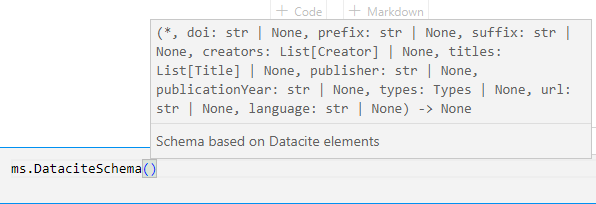